In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Реализовать функцию скользящего окна для заданного одномерного ряда
данных

In [ ]:
def sliding_window(data, window_step, step=1):
    num_windows = (len(data) - window_step) // step + 1
    result = np.zeros((num_windows, window_step))
    print(result)
    for i in range(num_windows):
        start = i * step
        result[i, :] = data[start:start + window_step]
    return result

In [ ]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4], [1, 4, 5], [4, 5, -2], [5, -2, 5], [-2, 5, 9], [5, 9, 0]])
print(np.array_equal(sliding_window(x1, window_step=window,step=step_s), A1))
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3], [-6, 5], [10, 11]])
print(np.array_equal(sliding_window(x2, window_step=window, step=step_s),A2))


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
True
[[0. 0.]
 [0. 0.]
 [0. 0.]]
True


Задание 2

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "salary"]
data = pd.read_csv(url, names=columns, sep=",\s*", engine='python')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


сколько мужчин и женщин (признак sex) представлено в этом
наборе данных

In [ ]:
male_people = data[data['sex'] =='Male']
print('Amount of male people',list(male_people.count())[0])

Amount of male people 21790


In [ ]:
female_people = data[data['sex'] =='Female']
print('Amount of female people',list(female_people.count())[0])

Amount of female people 10771


 Каков средний возраст женщин

In [ ]:
print('Average female age is', female_people['age'].mean())

Average female age is 36.85823043357163


какова доля граждан Германии

In [ ]:
german_people = data[data['native-country'] == 'Germany']
print(list(german_people.count())[0] / list(data.count())[0] * 100)

0.42074874850281013


Постройте гистограмму распределения (bar plot) образования людей
(признак education)

In [ ]:
values_educ = data['education'].value_counts()
print(values_educ)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'Assoc-voc'),
  Text(5, 0, '11th'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, '10th'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Prof-school'),
  Text(10, 0, '9th'),
  Text(11, 0, '12th'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, '5th-6th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

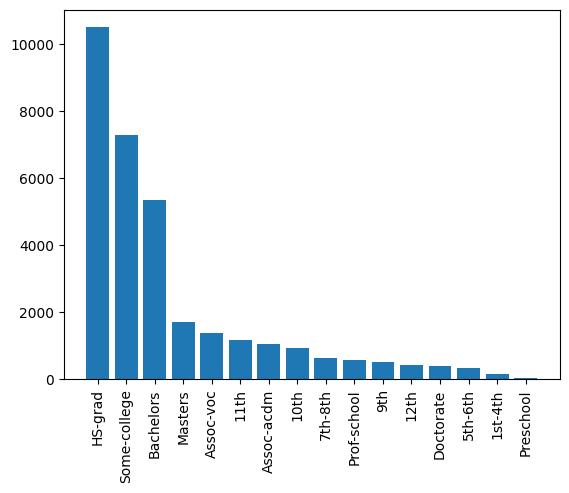

In [ ]:
plt.bar(values_educ.index, values_educ.values)
plt.xticks(rotation = 90)

каковы средние значения и среднеквадратичные отклонения
возраста тех, кто получает менее 50K в год

In [ ]:
less_50k = data[data['salary'] == '<=50K']
print("Std for people with income less than 50k is", less_50k['age'].std())
print("Mean for people with income less than 50k is", less_50k['age'].mean())

Std for people with income less than 50k is 14.02008849082488
Mean for people with income less than 50k is 36.78373786407767


правда ли, что люди, которые получают больше 50k, имеют как
минимум высшее образование

In [ ]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
higher_education_salary = data[data['education'].isin(higher_education)]['salary'].value_counts(normalize=True)
print("Percent of people with higher education and total income more than 50k is", list(higher_education_salary)[0])


Percent of people with higher education and total income more than 50k is 0.5687523773297832


выведите статистику возраста для каждой расы (признак race) и
каждого пола. Используйте groupby и describe. Каков максимальный
возраст мужчин расы Amer-Indian-Eskimo?

In [ ]:
race_sex_age_stats = data.groupby(['race', 'sex'])['age'].describe()
print("Stats for all races and genders:\n", race_sex_age_stats)
max_age_male_amer_indian_eskimo = race_sex_age_stats.loc[('Amer-Indian-Eskimo', 'Male'), 'max']
print("\nMax age of people from Amer-Indian-Eskimo race is", max_age_male_amer_indian_eskimo)

Stats for all races and genders:
                              count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             

среди кого больше доля зарабатывающих много (>50K): среди
женатых или холостых мужчин (признак marital-status)? Женатыми
считаем тех, у кого marital-status начинается с Married (Married-civspouse, Married-spouse-absent или Married-AF-spouse), остальных
считаем холостыми

In [ ]:
married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
married_men = data[(data['sex'] == 'Male') & (data['marital-status'].isin(married_statuses))]
single_men = data[(data['sex'] == 'Male') & (~data['marital-status'].isin(married_statuses))]
married_high_salary_ratio = married_men[married_men['salary'] == '>50K'].shape[0] / married_men.shape[0]
single_high_salary_ratio = single_men[single_men['salary'] == '>50K'].shape[0] / single_men.shape[0]
print("Percent of married people with income more than 50k is", married_high_salary_ratio)
print("Percent of never married people with income more than 50k is:", single_high_salary_ratio)

Percent of married people with income more than 50k is 0.4405139945351156
Percent of never married people with income more than 50k is: 0.08449509031397745


какое максимальное число часов человек работает в неделю
(признак hours-per-week)? Сколько людей работают такое
количество часов и каков среди них процент зарабатывающих
много

In [ ]:
max_hours_per_week = data['hours-per-week'].max()
people_max_hours = data[data['hours-per-week'] == max_hours_per_week]
high_salary_ratio_max_hours = people_max_hours[people_max_hours['salary'] == '>50K'].shape[0] / people_max_hours.shape[0]
print("Max work hours per week is",max_hours_per_week)
print("Amount of people who work most ",people_max_hours.shape[0])
print("Amount of people who earns a lot from them is",high_salary_ratio_max_hours)

Max work hours per week is 99
Amount of people who work most  85
Amount of people who earns a lot from them is 0.29411764705882354


посчитайте среднее время работы (hours-per-week) зарабатывающих
мало и много (salary) для каждой страны (native-country)

In [ ]:
mean_hours_per_country_salary = data.groupby(['native-country', 'salary'])['hours-per-week'].mean().unstack()
print("Average time of work for each category is\n",mean_hours_per_country_salary)

Average time of work for each category is
 salary                          <=50K       >50K
native-country                                  
?                           40.164760  45.547945
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                      

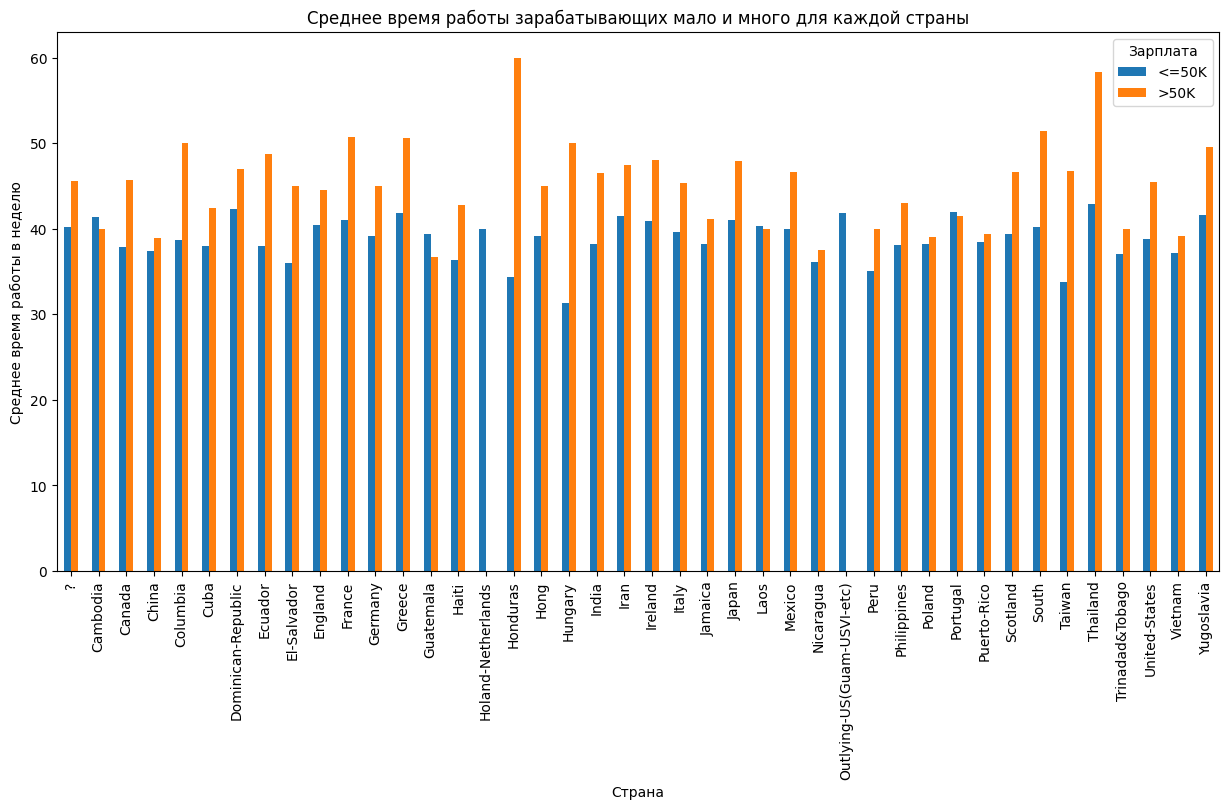

In [ ]:
mean_hours_per_country_salary.plot(kind='bar', figsize=(15, 7))
plt.title('Среднее время работы зарабатывающих мало и много для каждой страны')
plt.xlabel('Страна')
plt.ylabel('Среднее время работы в неделю')
plt.legend(title='Зарплата')

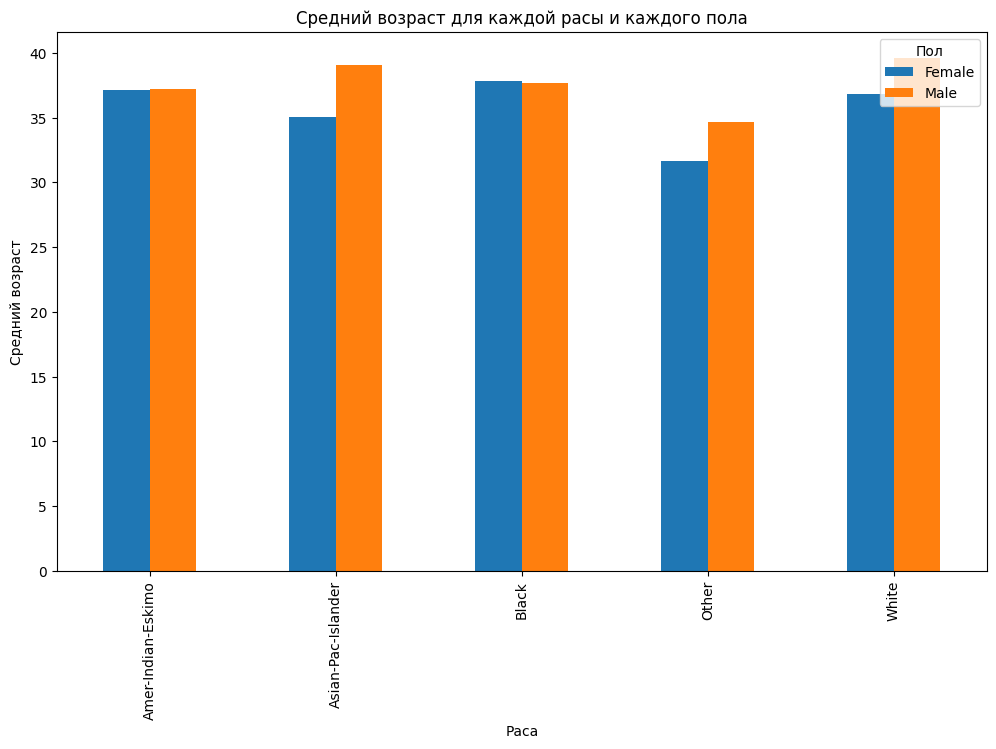

In [ ]:
race_sex_age_stats['mean'].unstack().plot(kind='bar', figsize=(12, 7))
plt.title('Средний возраст для каждой расы и каждого пола')
plt.xlabel('Раса')
plt.ylabel('Средний возраст')
plt.legend(title='Пол')
plt.show()

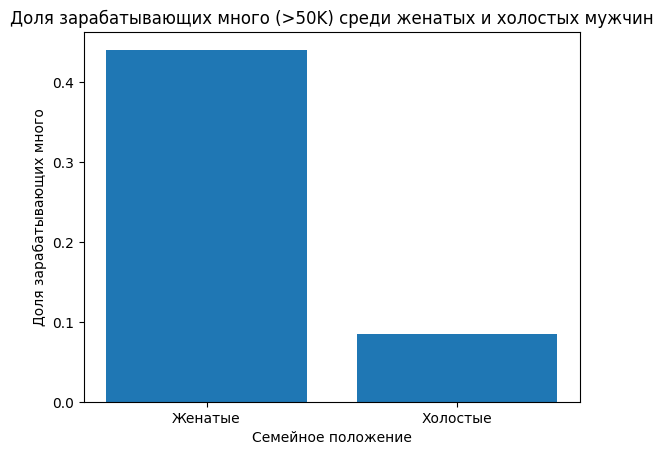

In [ ]:
labels = ['Женатые', 'Холостые']
high_salary_ratios = [married_high_salary_ratio, single_high_salary_ratio]

plt.bar(labels, high_salary_ratios)
plt.title('Доля зарабатывающих много (>50K) среди женатых и холостых мужчин')
plt.xlabel('Семейное положение')
plt.ylabel('Доля зарабатывающих много')
plt.show()

Задание 3

In [ ]:
url = '/content/StudentPerformanceFactors.csv'
df = pd.read_csv(url)
df['Delta_Score'] = - df['Previous_Scores'] + df['Exam_Score']

In [ ]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Delta_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,-6
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,2
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,-17
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,-27
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,5


0. Базовая статистика о данных

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Delta_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659,-7.834872
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456,14.243348
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000,-39.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000,-20.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000,-8.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000,4.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000,41.000000


1. Статистика по уровню образования в зависимости от наличия каких то Learning Disabilities

In [ ]:
avg_score_by_disability = df.groupby(['Learning_Disabilities','Parental_Education_Level'])['Exam_Score'].mean().unstack()
print(avg_score_by_disability)

Parental_Education_Level    College  High School  Postgraduate
Learning_Disabilities                                         
No                        67.444259    66.993726     68.081058
Yes                       66.133333    66.081921     67.000000


2. Статистика по баллам за экзамен в зависимости от уровня обучения и расстояния до дома

In [ ]:
avg_score_by_distance = df.groupby(['Distance_from_Home','Parental_Education_Level'])['Exam_Score'].mean().unstack()
print(avg_score_by_distance)

Parental_Education_Level    College  High School  Postgraduate
Distance_from_Home                                            
Far                       66.590000    66.074766     67.330769
Moderate                  66.965686    66.685864     67.749373
Near                      67.671007    67.136150     68.196335


3. Статистика по средним значениям по уровню посещений в зависимости от пола и расстояния от дома

In [ ]:
avg_attendance_by_distance = df.groupby(['Distance_from_Home','Gender'])["Attendance"].mean().unstack()
print(avg_attendance_by_distance)

Gender                 Female       Male
Distance_from_Home                      
Far                 79.199288  79.612732
Moderate            79.322581  80.237726
Near                80.305961  80.066518


4. Данные по уровню сна в зависимости от пола

In [ ]:
avg_sleep_hours_by_gender = df.groupby(['Gender'])['Sleep_Hours'].mean()
print(avg_sleep_hours_by_gender)

Gender
Female    7.041890
Male      7.019664
Name: Sleep_Hours, dtype: float64


5. Данные по разнице между первым и вторым результатами экзаменов в зависимости от пола и количества сна

Gender            Female       Male
Hours_Studied                      
1             -36.000000   7.000000
2              -5.500000  -2.750000
3             -11.500000  -1.333333
4             -24.666667 -11.181818
5             -14.444444 -11.916667
6             -17.571429 -13.400000
7             -10.360000 -10.538462
8             -13.409091 -12.666667
9             -10.903226 -13.036364
10            -12.727273 -11.960000
11             -9.843750 -11.439024
12             -8.472222  -7.033333
13             -7.034483 -10.244275
14            -11.418803  -8.855263
15             -7.550725  -9.073446
16             -8.873418  -8.963731
17             -8.012579  -8.950450
18             -7.305882  -7.212121
19             -7.702020  -7.827160
20             -9.088542  -8.890110
21             -5.744186  -8.096525
22             -7.044025  -7.037037
23             -7.514124  -6.820513
24             -8.082759  -5.636792
25             -5.544000  -6.042683
26             -7.169811  -6

<Axes: xlabel='Hours_Studied'>

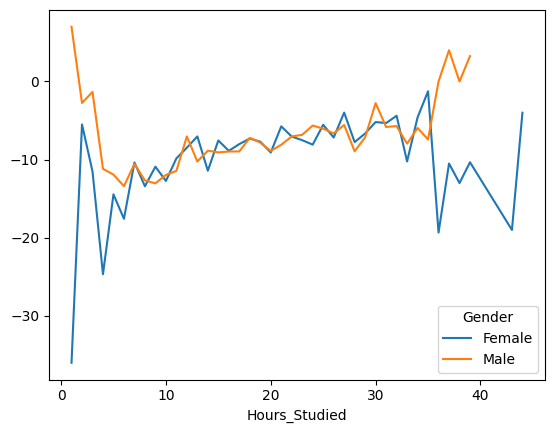

In [ ]:
df['Delta_Score'] = - df['Previous_Scores'] + df['Exam_Score']
avg_delta_score_by_hours_studied_and_gender = df.groupby(['Hours_Studied','Gender'])['Delta_Score'].mean().unstack()
print(avg_delta_score_by_hours_studied_and_gender)
avg_delta_score_by_hours_studied_and_gender.plot()

6. Данные по разнице между баллами за первый и второй экзамены в зависимости от пола, уровня мотивации и участия во внеклассной активности

In [ ]:
avg_delta_score_by_motivation_and_extracarricular = df.groupby(['Motivation_Level','Extracurricular_Activities','Gender'])['Delta_Score'].mean().unstack()
print(avg_delta_score_by_motivation_and_extracarricular)

Gender                                         Female      Male
Motivation_Level Extracurricular_Activities                    
High             No                         -8.520548 -8.195946
                 Yes                        -7.139818 -7.903158
Low              No                         -9.054755 -8.544053
                 Yes                        -7.720648 -8.612150
Medium           No                         -7.582609 -7.515424
                 Yes                        -7.572979 -7.289136


7. Данные по уровню изменения баллов за экзамен в зависимости от уровня мотивации и качества учителя

In [ ]:
avg_score_by_teacher_motivation = df.groupby(['Motivation_Level','Teacher_Quality'])['Delta_Score'].mean().unstack()
print(avg_score_by_teacher_motivation)

Teacher_Quality       High        Low    Medium
Motivation_Level                               
High             -8.022222  -7.820896 -7.688396
Low              -8.006873 -11.557692 -8.271100
Medium           -7.281250  -9.049046 -7.227204


8. Данные по уровню изменения результатов экзамена в зависимости от типа школы

In [ ]:
avg_score_by_school_type = df.groupby(['School_Type'])['Delta_Score'].mean()
print(avg_score_by_school_type)

School_Type
Private   -7.489796
Public    -7.985646
Name: Delta_Score, dtype: float64


9. Данные по уровню сна в зависимости от мотивации и участия во внеклассой деятельности

In [ ]:
avg_sleep_hours_by_motivation_and_extracarricular = df.groupby(['Extracurricular_Activities','Motivation_Level'])['Sleep_Hours'].mean()
print(avg_sleep_hours_by_motivation_and_extracarricular)

Extracurricular_Activities  Motivation_Level
No                          High                6.988350
                            Low                 7.023720
                            Medium              7.042868
Yes                         High                7.057214
                            Low                 7.028169
                            Medium              7.021522
Name: Sleep_Hours, dtype: float64


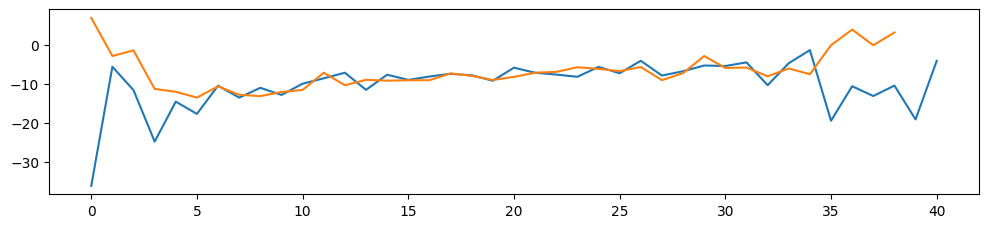

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(df['Extracurricular_Activities'].unique()))
plt.figure(figsize=figsize)
plt.plot([i for i in range(len(list(avg_delta_score_by_hours_studied_and_gender['Female'])))],list(avg_delta_score_by_hours_studied_and_gender['Female']))
plt.plot([i for i in range(len(list(avg_delta_score_by_hours_studied_and_gender['Male'])))],list(avg_delta_score_by_hours_studied_and_gender['Male']))

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

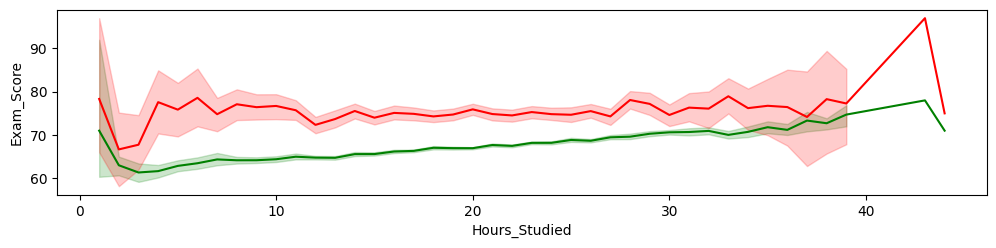

In [ ]:
figsize = (12, 1.2 * len(df['Extracurricular_Activities'].unique()))
plt.figure(figsize=figsize)
sns.lineplot(df, x='Hours_Studied', y='Exam_Score',color = 'green')
sns.lineplot(df, x='Hours_Studied', y='Previous_Scores',color = 'red')

<ipython-input-85-18f59bcfa326>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df, y='Delta_Score', x='Tutoring_Sessions', palette='Dark2')


<Figure size 2400x480 with 0 Axes>

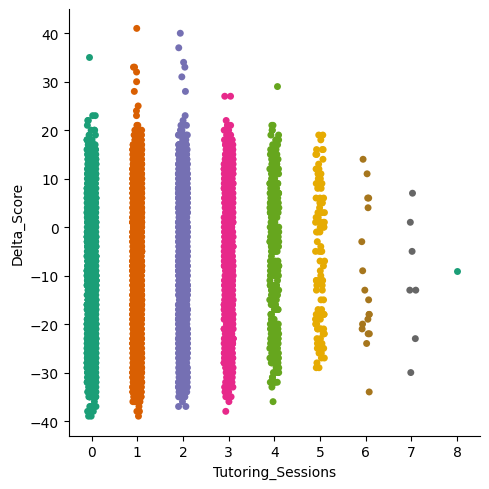

In [ ]:
figsize = (24, 2.4 * len(df['Extracurricular_Activities'].unique()))
plt.figure(figsize=figsize)
sns.catplot(df, y='Delta_Score', x='Tutoring_Sessions', palette='Dark2')

<Axes: xlabel='Hours_Studied', ylabel='Parental_Involvement'>

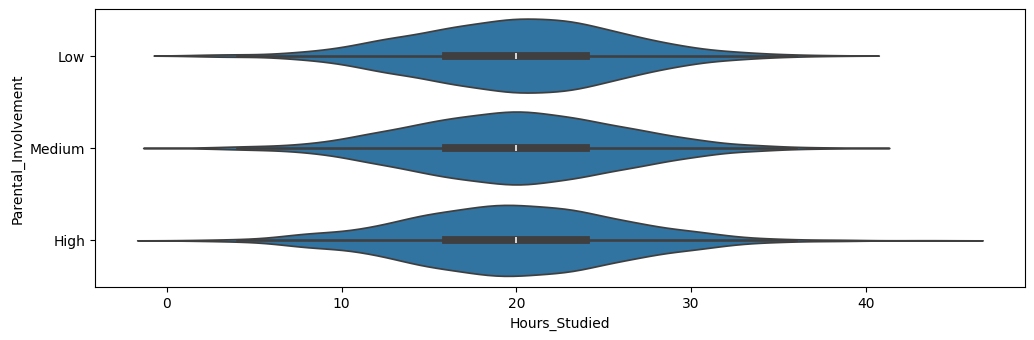

In [ ]:
figsize = (12, 1.2 * len(df['Parental_Involvement'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Hours_Studied', y='Parental_Involvement', inner='box')